![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# WEEK 4: Assignements

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2019-11-07)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/DSF_WEEK_4_EXERCISES.ipynb)

# Exercise 1: dispersion plots [OBLIGATORY]

1. Load the `holy_grail.txt` dataset and create a dictionary of names and indexes like `{"NAME": [1, 2, 5, 10, ...]}` to store when does each NOUN appears among the 5 most frequent ones.
3. Visualize in the same graph the appearances of the top 5 characters to compare them.
4. **OPTIONAL**: Try the same exercise with [this file in the GitHub repo](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/pride_and_prejudice.txt)

In [1]:
pwd

'/Users/MarcelRos/Desktop/BTS/GitHub/bts-mbds-data-science-foundations-2019/sessions/Notebooks'

In [2]:
import spacy
from spacy import load

nlp = spacy.load("en_core_web_sm")

holy_grail = nlp(open('/Users/MarcelRos/Desktop/BTS/GitHub/bts-mbds-data-science-foundations-2019/sessions/data/holy_grail.txt', 'r').read())

In [3]:
holy_grail

SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop clop] 
SOLDIER #1: Halt!  Who goes there?
ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!
SOLDIER #1: Pull the other one!
ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.
SOLDIER #1: What?  Ridden on a horse?
ARTHUR: Yes!
SOLDIER #1: You're using coconuts!
ARTHUR: What?
SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.
ARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--
SOLDIER #1: Where'd you get the coconuts?
ARTHUR: We found them.
SOLDIER #1: Found them?  In Mercea?  The coconut's tropical!
ARTHUR: What do you mean?
SOLDIER #1: Well, this is a temperate zone.
AR

In [4]:
from collections import Counter
from spacy.symbols import ORTH, POS, NOUN, VERB, TAG, PERSON

char_counter = Counter()

for token in holy_grail:
    if token.pos_ == 'NOUN'and token.text != '#':
        char_counter[token.text] += 1

In [5]:
char_counter.most_common(5)

[('boom', 42), ('witch', 37), ('music', 29), ('clop', 26), ('singing', 26)]

In [6]:
from collections import defaultdict

import matplotlib.pyplot as plt

In [7]:
names, _ = zip(*char_counter.most_common(5))

In [8]:
print(names, _)

('boom', 'witch', 'music', 'clop', 'singing') (42, 37, 29, 26, 26)


In [9]:
indexes = defaultdict(list)

for token in holy_grail:
    if token.text in names:
        print(token.i)
        indexes[token.text].append(token.i)

7
8
9
20
21
22
591
592
593
1136
1189
1190
1191
1241
1251
1931
2178
2181
2194
2197
2215
2218
2239
2244
2303
2304
2305
2985
2989
2995
2999
3015
3019
3023
3027
3034
3038
3042
3046
3050
3057
3061
3065
3084
3091
3095
3099
3103
3114
3149
3186
3193
3285
3445
3530
3959
3967
3973
3977
4021
4026
4085
4089
4093
4366
4367
4368
4500
4697
4698
4699
4702
4703
4730
4751
4791
4946
4949
4978
4981
4982
4983
6076
6077
6078
6158
6307
6372
6426
6842
6859
6877
6903
6923
6948
6967
7117
7129
7133
7139
7145
7190
8701
9247
9250
9645
9660
9674
9682
9690
9698
9706
9714
9722
9730
9743
9756
9763
9768
9786
9803
10127
10303
11032
11036
11666
12752
12777
12803
12822
12841
12861
12902
12922
12956
12984
13012
13039
13071
13074
13075
13076
13108
14057
14143
14303
14304
14305
14553
14556
14557
14558
14561
14565
14594
14595
14596
14597
14598
14604
14605
14606
14607
14726
14888
15051
15053
15054
15131
15261
15262
15263
16298
16777
17590
17593
17602
17652
17657
18120
18123


In [10]:
print(indexes)

defaultdict(<class 'list'>, {'clop': [7, 8, 9, 20, 21, 22, 591, 592, 593, 1189, 1190, 1191, 2303, 2304, 2305, 4366, 4367, 4368, 4697, 4698, 4699, 4981, 4982, 4983, 6076, 6077, 6078, 13074, 13075, 13076, 14303, 14304, 14305, 14556, 14557, 14558, 15261, 15262, 15263], 'singing': [1136, 1931, 4500, 4730, 4949, 6158, 6372, 6426, 6842, 6859, 6877, 6903, 6923, 6948, 6967, 7133, 11036, 12777, 12803, 12822, 12841, 12861, 12902, 12922, 12956, 12984, 13012, 13039, 14057, 14143, 17652], 'music': [1241, 1251, 2178, 2181, 2194, 2197, 2215, 2218, 2239, 2244, 4978, 6307, 9247, 9250, 10127, 10303, 11032, 11666, 12752, 13071, 13108, 14553, 14561, 17590, 17593, 17602, 17657, 18120, 18123], 'witch': [2985, 2989, 2995, 2999, 3015, 3019, 3023, 3027, 3034, 3038, 3042, 3046, 3050, 3057, 3061, 3065, 3084, 3091, 3095, 3099, 3103, 3114, 3149, 3186, 3193, 3285, 3445, 3530, 3959, 3967, 3973, 3977, 4021, 4026, 4085, 4089, 4093], 'boom': [4702, 4703, 4751, 4791, 4946, 7117, 7129, 7139, 7145, 7190, 8701, 9645, 9660,

0
1
2
3
4


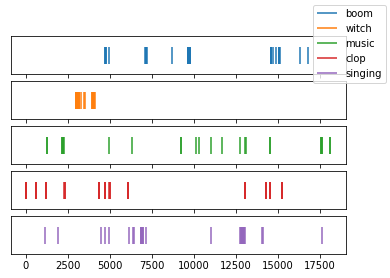

In [11]:
fig, axes = plt.subplots(5, sharex=True)

for index, name in enumerate(names):
    print(index)
    axes[index].eventplot(indexes[name], label=name, color="C{}".format(index))
    axes[index].get_yaxis().set_visible(False)

fig.legend()

In [12]:
nlp = spacy.load("en_core_web_sm")

pride = nlp(open('/Users/MarcelRos/Desktop/BTS/GitHub/bts-mbds-data-science-foundations-2019/sessions/data/pride_and_prejudice.txt', 'r').read())

In [13]:
pride

The Project Gutenberg EBook of Pride and Prejudice, by Jane Austen

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Pride and Prejudice

Author: Jane Austen

Posting Date: August 26, 2008 [EBook #1342]
Release Date: June, 1998
Last updated: February 15, 2015]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***




Produced by Anonymous Volunteers





PRIDE AND PREJUDICE

By Jane Austen



Chapter 1


It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.

However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered the rightful property
of some one or

In [14]:
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.symbols import ORTH, POS, NOUN, VERB, TAG, PERSON

char_counter_pride = Counter()

for token in pride:
    if token.pos_ == 'NOUN' and token.text not in STOP_WORDS and token.text != '#':
        char_counter_pride[token.text] += 1

In [15]:
char_counter_pride.most_common(5)

[('sister', 218), ('time', 203), ('family', 151), ('man', 150), ('room', 150)]

In [16]:
names_2, _ = zip(*char_counter_pride.most_common(5))

In [17]:
print(names_2, _)

('sister', 'time', 'family', 'man', 'room') (218, 203, 151, 150, 150)


In [18]:
from collections import defaultdict
import matplotlib.pyplot as plt

indexes_2 = defaultdict(list)

for token in pride:
    if token.text in names_2:
        print(token.i)
        indexes[token.text].append(token.i)

152
180
365
476
1758
2198
2258
2923
2950
3017
3068
3182
3268
3292
3368
3500
3589
3745
3815
3970
4046
4131
4138
4455
4526
4559
4577
4629
4663
4744
4965
5079
5216
5408
5613
5725
5809
5888
5980
6334
6494
6754
6845
6848
7286
7616
7711
8267
8463
8972
8989
9132
10277
10373
10656
10909
12393
12423
12631
12754
12992
13013
13079
13196
13295
13347
13434
13616
13705
13731
13806
13839
13852
13962
14086
14183
14388
14592
15046
15196
15354
15369
15371
15408
15489
15576
15701
15860
16571
16639
16655
16918
16935
17188
17461
17522
17707
17753
17953
18038
18108
18304
18675
19459
19590
19652
20543
20569
20586
20773
20842
21172
21440
21514
21624
22622
22806
22959
23158
23356
23549
23776
23884
23998
24008
24216
24527
24662
24870
25020
25074
25086
25132
25172
25215
25485
25663
26096
26524
26600
26631
26655
27065
27296
27647
27681
27816
27903
27982
28164
28228
28908
28978
29044
29233
29404
29563
29667
29675
30118
30187
30386
30474
30552
30993
31059
31222
31308
31413
31753
31786
31932
32247
32301
32526
32562


In [19]:
print(indexes_2)

defaultdict(<class 'list'>, {})


0
1
2
3
4


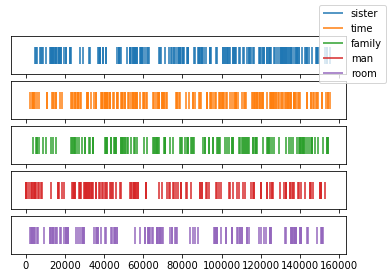

In [20]:
fig, axes = plt.subplots(5, sharex=True)

for index, name in enumerate(names_2):
    print(index)
    axes[index].eventplot(indexes[name], label=name, color="C{}".format(index))
    axes[index].get_yaxis().set_visible(False)

fig.legend()

# Exercise 2: clustering words [OBLIGATORY]

Generate a scatter plot with the distance of the words in [this file](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/1-1000.txt). Load it correctly, beware not to load it as html! Use either PCA or t-SNE to cluster the words, play with different language models. For extra points, find the way to annotate the labels without clustering them, using arrows for instance. [Hint](https://stackoverflow.com/questions/40021676/pyplot-label-scatter-plot-with-coincident-points-overlapping-annotations).

## t-SNE

In [21]:
import numpy as np
import spacy
from sklearn.manifold import TSNE

nlp = spacy.load("en")

textfile = open('/Users/MarcelRos/Desktop/BTS/GitHub/bts-mbds-data-science-foundations-2019/sessions/data/1-1000.txt', 'r').read()

textfile_tokens = nlp(textfile)

In [22]:
textfile

"the\nof\nto\nand\na\ninhis\nis\nit\nyou\nthat\nhe\nwas\nfor\non\nare\nwith\nas\nI\nhis\nthey\nbe\nat\none\nhave\nthis\nfrom\nor\nhad\nby\nword\nbut\nwhat\nsome\nwe\ncan\nout\nother\nwere\nall\nthere\nwhen\nup\nuse\nyour\nhow\nsaid\nan\neach\nshe\nwhich\ntheir\ntime\nif\nwill\nway\nabout\nmany\nthen\nthem\nwrite\nwould\nlike\nso\nthese\nher\nlong\nmake\nthing\nsee\nhim\ntwo\nhas\nlook\nmore\nday\ncould\ngo\ncome\ndid\nnumber\nsound\nno\nmost\npeople\nmy\nover\nknow\nwater\nthan\ncall\nfirst\nwho\nmay\ndown\nside\nbeen\nnow\nfind\nany\nnew\nwork\npart\ntake\nget\nplace\nmade\nlive\nwhere\nafter\nback\nlittle\nonly\nround\nman\nyear\ncame\nshow\nevery\ngood\nme\ngive\nour\nunder\nname\nvery\nthrough\njust\nform\nsentence\ngreat\nthink\nsay\nhelp\nlow\nline\ndiffer\nturn\ncause\nmuch\nmean\nbefore\nmove\nright\nboy\nold\ntoo\nsame\ntell\ndoes\nset\nthree\nwant\nair\nwell\nalso\nplay\nsmall\nend\nput\nhome\nread\nhand\nport\nlarge\nspell\nadd\neven\nland\nhere\nmust\nbig\nhigh\nsuch\nfollo

In [23]:
l = []
for token in textfile_tokens:
    if token.is_space:
        pass #print("This is a space")
    elif token.has_vector:
        l.append(token.text)
        print(token.text)
len(l)
print(l)

the
of
to
and
a
inhis
is
it
you
that
he
was
for
on
are
with
as
I
his
they
be
at
one
have
this
from
or
had
by
word
but
what
some
we
can
out
other
were
all
there
when
up
use
your
how
said
an
each
she
which
their
time
if
will
way
about
many
then
them
write
would
like
so
these
her
long
make
thing
see
him
two
has
look
more
day
could
go
come
did
number
sound
no
most
people
my
over
know
water
than
call
first
who
may
down
side
been
now
find
any
new
work
part
take
get
place
made
live
where
after
back
little
only
round
man
year
came
show
every
good
me
give
our
under
name
very
through
just
form
sentence
great
think
say
help
low
line
differ
turn
cause
much
mean
before
move
right
boy
old
too
same
tell
does
set
three
want
air
well
also
play
small
end
put
home
read
hand
port
large
spell
add
even
land
here
must
big
high
such
follow
act
why
ask
men
change
went
light
kind
off
need
house
picture
try
us
again
animal
point
mother
world
near
build
self
earth
father
head
stand
own
page
should
country
found
a

In [24]:
import collections

for item, count in collections.Counter(l).items():
    if count > 1:
        print(item)

In [25]:
textfile_vectors = np.vstack([word.vector for word in textfile_tokens if word.has_vector and not word.is_space])
print(len(textfile_vectors))

998


In [26]:
tsne = TSNE(n_components=3, init='random', random_state=3, perplexity=1)
textfile_vecs_tsne = tsne.fit_transform(textfile_vectors)

In [27]:
print(textfile_vecs_tsne)

[[  6.668829   12.428322   27.924158 ]
 [ -6.4962306 -28.028162   29.02872  ]
 [ -6.08265    19.680065   22.351816 ]
 ...
 [ 34.252884   14.360085   -2.095892 ]
 [ 17.865345   -9.68824    -5.3621354]
 [ 15.448553   19.279976    1.6052587]]


In [28]:
textfile_vecs_tsne = np.c_[l, textfile_vecs_tsne]

In [29]:
print(textfile_vecs_tsne)

[['the' '6.668829' '12.428322' '27.924158']
 ['of' '-6.4962306' '-28.028162' '29.02872']
 ['to' '-6.08265' '19.680065' '22.351816']
 ...
 ['teeth' '34.252884' '14.360085' '-2.095892']
 ['shell' '17.865345' '-9.68824' '-5.3621354']
 ['neck' '15.448553' '19.279976' '1.6052587']]


In [30]:
component_1_tsne = [float(x) for x in textfile_vecs_tsne[:, 1]]
component_2_tsne = [float(x) for x in textfile_vecs_tsne[:, 2]]
component_3_tsne = [float(x) for x in textfile_vecs_tsne[:, 3]]
distance = [np.sqrt(np.power(float(x), 2) + np.power(float(y), 2) + np.power(float(z), 2)) for x, y, z in zip(textfile_vecs_tsne[:, 1], textfile_vecs_tsne[:, 2], textfile_vecs_tsne[:, 3])]

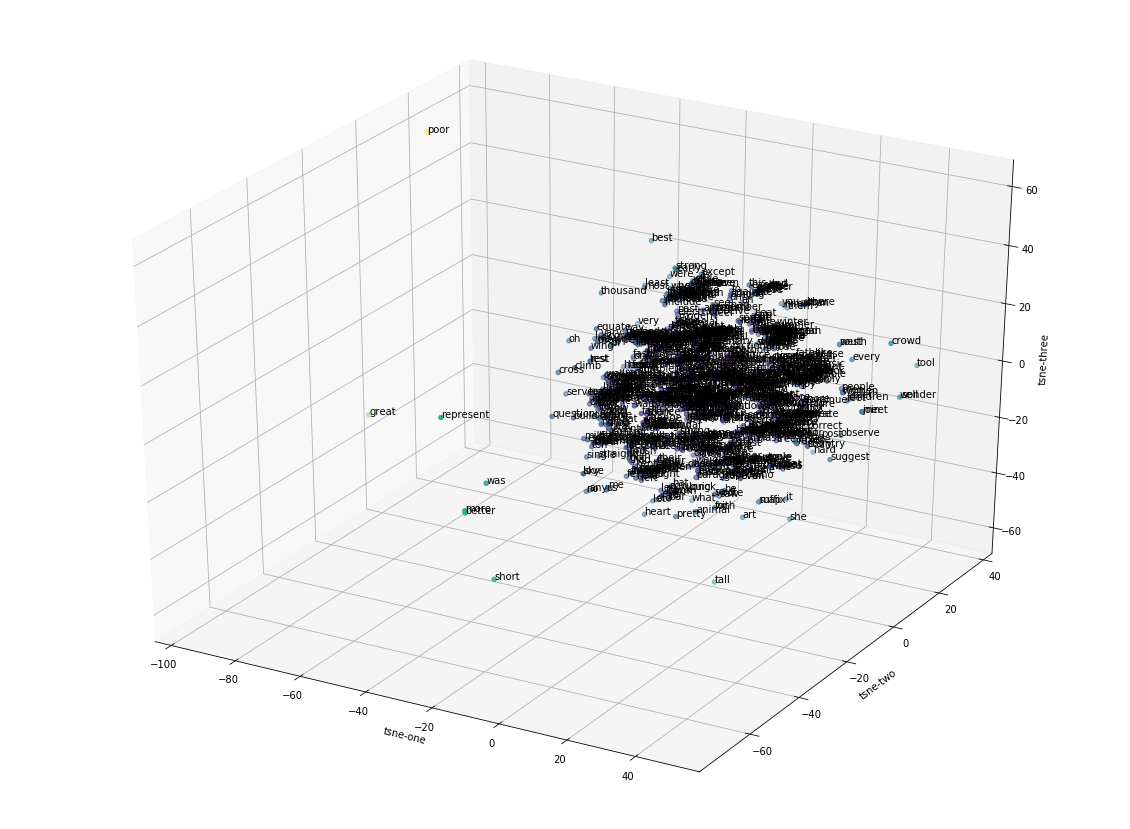

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(20,15)).gca(projection='3d')
ax.scatter(
    xs=component_1_tsne, 
    ys=component_2_tsne, 
    zs=component_3_tsne, 
    c=distance
)

for name, x, y, z in zip(textfile_vecs_tsne[:, 0], textfile_vecs_tsne[:, 1], textfile_vecs_tsne[:, 2], textfile_vecs_tsne[:, 3]):
    ax.text(float(x), float(y), float(z), name)

ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()

## PCA

In [32]:
import numpy as np
import spacy
from sklearn.decomposition import PCA

nlp = spacy.load("en")

text_tokens = nlp(textfile)

text_vectors = np.vstack([word.vector for word in text_tokens if word.has_vector and not word.is_space])

pca = PCA(n_components=2)
text_vecs_transformed = pca.fit_transform(text_vectors)

In [33]:
print(text_vecs_transformed)

[[ 6.5218945  2.5837977]
 [ 4.0254645  8.654118 ]
 [ 3.1243875  8.128366 ]
 ...
 [ 2.0347624  1.2216994]
 [-2.8433106 -3.417888 ]
 [-1.5859824  5.177581 ]]


In [34]:
import collections

for item, count in collections.Counter(l).items():
    if count > 1:
        print(item)

In [35]:
print(len(textfile_vectors))

998


In [36]:
text_vecs_transformed = np.c_[l, text_vecs_transformed]

In [37]:
print(text_vecs_transformed)

[['the' '6.5218945' '2.5837977']
 ['of' '4.0254645' '8.654118']
 ['to' '3.1243875' '8.128366']
 ...
 ['teeth' '2.0347624' '1.2216994']
 ['shell' '-2.8433106' '-3.417888']
 ['neck' '-1.5859824' '5.177581']]


In [38]:
component_one = [float(x) for x in text_vecs_transformed[:, 1]]
component_two = [float(x) for x in text_vecs_transformed[:, 2]]
distance_1 = [float(x)-float(y) for x, y in zip(text_vecs_transformed[:, 1], text_vecs_transformed[:, 2])]

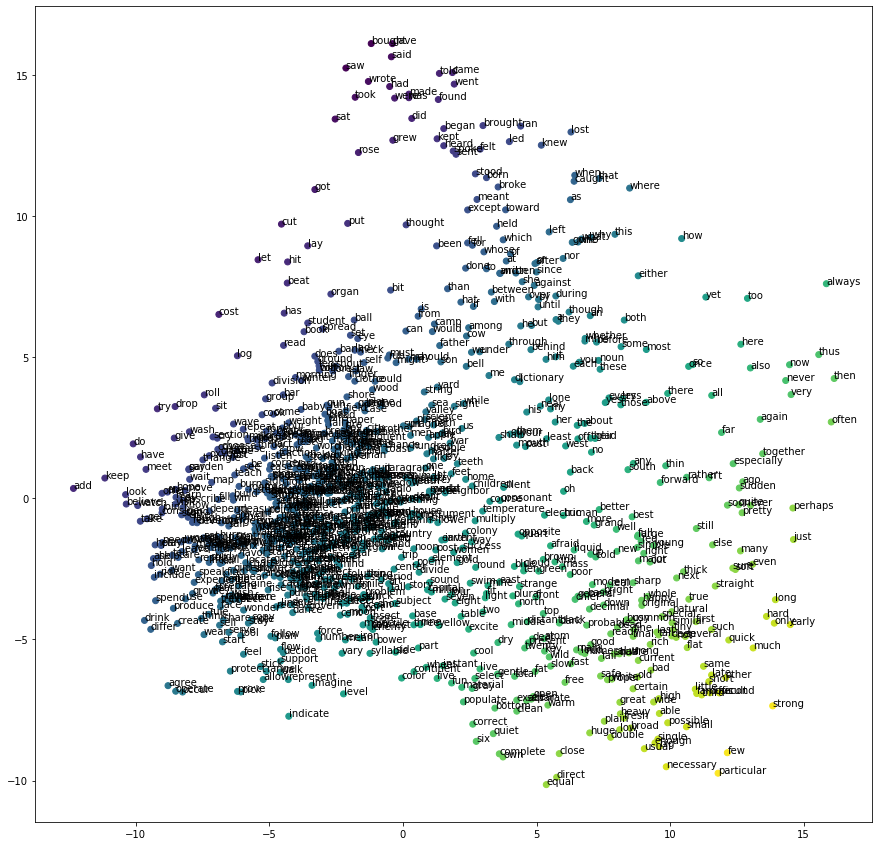

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(component_one, component_two, c=distance_1)

for i, txt in enumerate(text_vecs_transformed[:, 0]):
    ax.annotate(txt, (component_one[i], component_two[i]))
    



In [61]:
pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7099 sha256=3b7fa443c7269420ca59d25f99145d0ca859b810a220174dcebececd74ac8462
  Stored in directory: /Users/MarcelRos/Library/Caches/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText
Note: you may need to restart the kernel to use updated packages.


AttributeError: 'str' object has no attribute 'get_position'

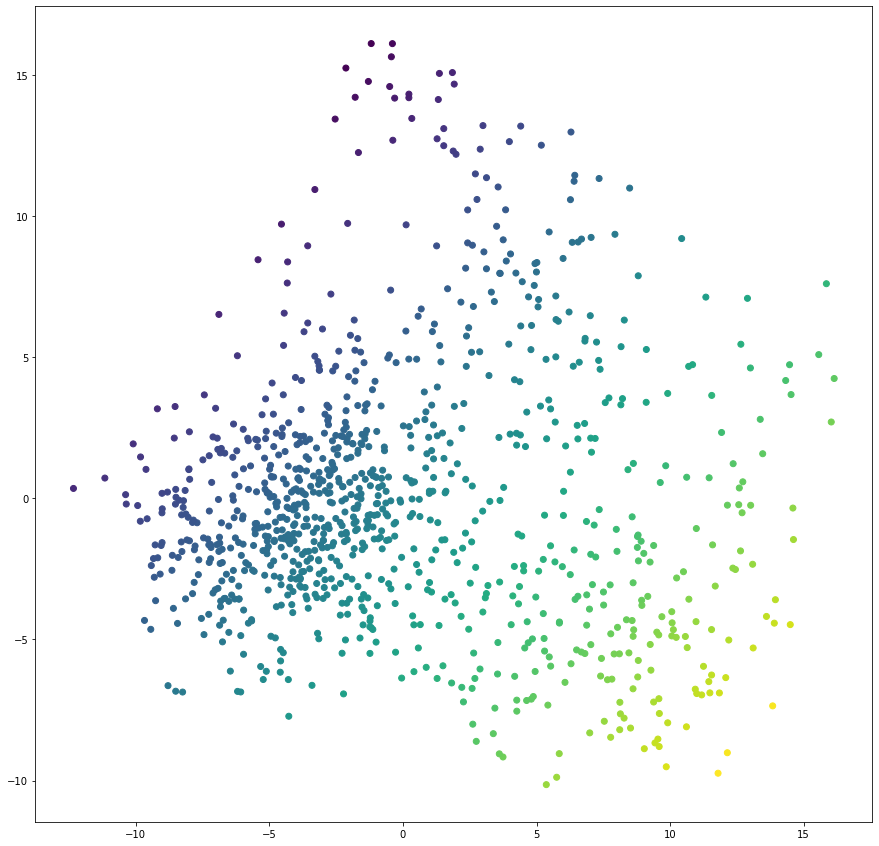

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(component_one, component_two, c=distance_1)

for i, txt in enumerate(text_vecs_transformed[:, 0]):
    d = ((x-old_x)**2+(y-old_y)**2)**(.5)
    
    
    ax.annotate(txt, (component_one[i], component_two[i]))
    




TypeError: unsupported operand type(s) for -: 'list' and 'float'

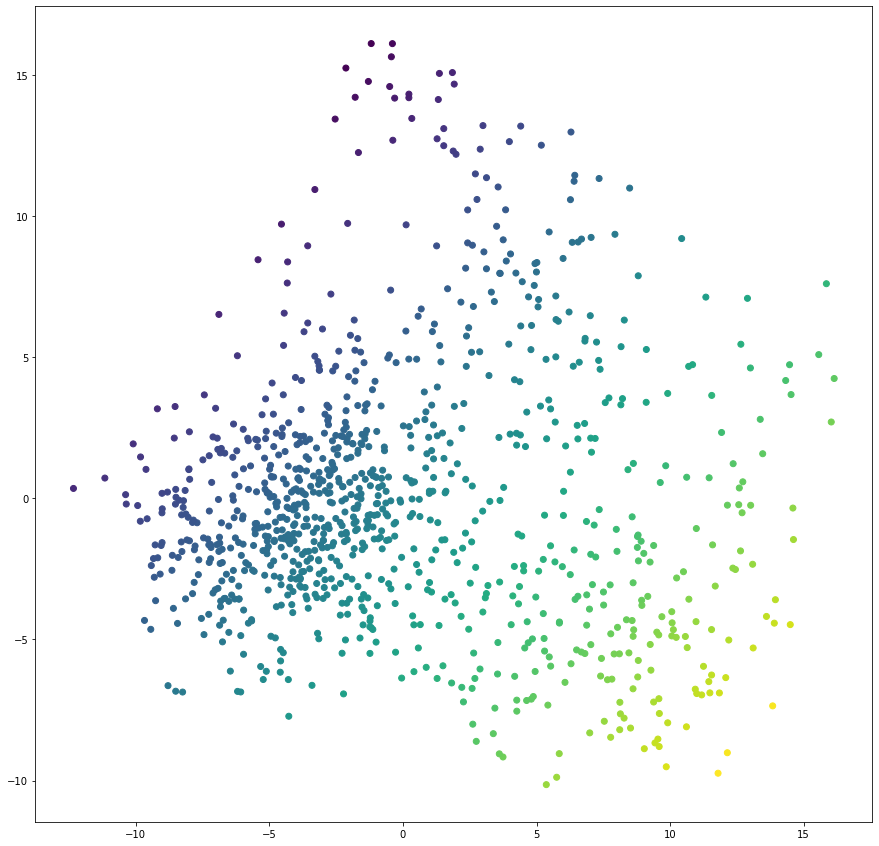

In [66]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(component_one, component_two, c=distance_1)


old_x = old_y = 1e9
thresh = .1
x = component_one
y = component_two


for i, txt in enumerate(text_vecs_transformed[:, 0]):
    
    d = ((x-old_x)**2+(y-old_y)**2)**(.5)
    flip = 1
    if d < .1: flip=-2
    
    ax.annotate(txt, (component_one[i], component_two[i]), xy = (x, y), xytext = (-20*flip, 20*flip),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree


def get_label_xy(tree, thresh, data, i):
    neighbors = tree.query_ball_point([data[i, 0], data[i, 1]], thresh)
    if len(neighbors) == 1:
        xy = (-30, 30)
    else:
        mean = np.mean(data[:, :2][neighbors], axis=0)

        if mean[0] == data[i, 0] and mean[1] == data[i, 1]:
            if i < np.max(neighbors):
                xy = (-30, 30)
            else:
                xy = (30, -30)
        else:
            angle = np.arctan2(data[i, 1] - mean[1], data[i, 0] - mean[0])

            if angle > np.pi / 2:
                xy = (-30, 30)
            elif angle > 0:
                xy = (30, 30)
            elif angle > -np.pi / 2:
                xy = (30, -30)
            else:
                xy = (-30, -30)
    return xy


def labeled_scatter_plot(data, labels):
    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(
        data[:, 0], data[:, 1], marker = 'o', c = data[:, 2], s = data[:, 3]*1500,
        cmap = plt.get_cmap('Spectral'))

    tree = cKDTree(data[:, :2])
    thresh = .1

    for i in range(data.shape[0]):
        xy = get_label_xy(tree, thresh, data, i)

        plt.annotate(
            labels[i],
            xy = data[i, :2], xytext = xy,
            textcoords = 'offset points', ha = 'center', va = 'center',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))


np.random.seed(0)
N = 10
data = np.random.random((N, 4))
data[1, :2] = data[0, :2]
data[-1, :2] = data[-2, :2] + .01
data[5, :2] = data[4, :2] + [.05, 0]
data[6, :2] = data[4, :2] + [.05, .05]
data[7, :2] = data[4, :2] + [0, .05]
labels = ['point{0}'.format(i) for i in range(N)]

labeled_scatter_plot(data, labels)

plt.show()

# Exercise 3: Jaccard Similairty and TF-IDF [OBLIGATORY]

Collect at least 7 sentences from political parties in your country. Try to do Jaccard Similarity and tf-idf on them so that you can see what are the most common words used between the parties. You neeed to translate the sentences to english, so that I can evaluate :)

Why Jaccard Similarity tends to fail? [Hint](https://medium.com/@adriensieg/text-similarities-da019229c894)

If you do not want to collect those sentences use the following:



In [71]:
t0 = "President Trump greets the press in Chicago addressing the Cambridge Analytica release"
t1 = "Trump speaks in front of the press in Chicago, regarding the Cambridge Analytica scandal"
t2 = "Vladimir Putin, president of Russia, denies any involvement with electoral hacking through Cambridge Analytica"
t3 = "Democrats accuse Russia of interfernig the United States elections using hacking methods"
t4 = "Republicans deny any interference from Russia into the elections, and mock democrats about it"
t5 = "Vladimir Putin attends a press conference about the issues occurring in Crimea"
t6 = "The president of Russia, Vladimir Putin, replied questions regarding the scandal around Crimea"

## Jaccard similarity

Jaccard similarity considers the intersection of phrases/docs (same words with same root) but is not able to get the semantic similarity and lexical similarity, so the meaning of two sentences/docs and substitues of words.
So similarity of documents increases with its size of words.

In [67]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [68]:
nlp = spacy.load("en")

In [69]:
def lemmatize(doc):
    return [token.lemma_ for token in doc if not
           (token.is_punct or token.is_space or token.lower_ in STOP_WORDS)]

In [72]:
lemmatize(nlp(t0))

['President',
 'Trump',
 'greet',
 'press',
 'Chicago',
 'address',
 'Cambridge',
 'Analytica',
 'release']

In [73]:
def jaccard(doc1, doc2):
    s1 = set(lemmatize(doc1))
    s2 = set(lemmatize(doc2))
    return len(s1.intersection(s2)) / len(s1.union(s2))

In [74]:
jaccard(nlp(t0), nlp(t1))

0.3333333333333333

In [75]:
import numpy as np
import pandas as pd

In [76]:
data = np.zeros((7, 7))
docs = [nlp(text) for text in (t0, t1, t2, t3, t4, t5, t6)]
for ii, doc_a in enumerate(docs):
    for jj, doc_b in enumerate(docs):
        data[ii, jj] = jaccard(doc_a, doc_b)

pd.DataFrame(data)

,0,1,2,3,4,5,6
0,1.000000,0.333333,0.117647,0.000000,0.000000,0.062500,0.000000
1,0.333333,1.000000,0.133333,0.000000,0.000000,0.071429,0.071429
2,0.117647,0.133333,1.000000,0.055556,0.133333,0.125000,0.285714
3,0.000000,0.000000,0.055556,1.000000,0.142857,0.000000,0.062500
4,0.000000,0.000000,0.133333,0.142857,1.000000,0.000000,0.071429
5,0.062500,0.071429,0.125000,0.000000,0.000000,1.000000,0.230769
6,0.000000,0.071429,0.285714,0.062500,0.071429,0.230769,1.000000


## TF - IDF:

In [77]:
docs = [nlp(text) for text in (t0, t1, t2, t3, t4, t5, t6)]

for doc in docs:
    print(doc)

President Trump greets the press in Chicago addressing the Cambridge Analytica release
Trump speaks in front of the press in Chicago, regarding the Cambridge Analytica scandal
Vladimir Putin, president of Russia, denies any involvement with electoral hacking through Cambridge Analytica
Democrats accuse Russia of interfernig the United States elections using hacking methods
Republicans deny any interference from Russia into the elections, and mock democrats about it
Vladimir Putin attends a press conference about the issues occurring in Crimea
The president of Russia, Vladimir Putin, replied questions regarding the scandal around Crimea


In [78]:
from collections import Counter

In [79]:
def tf(word, doc):
    counts = Counter(lemmatize(doc))
    return counts[word]

In [80]:
print(tf('Trump', nlp(t0)))
print(tf('Russia', nlp(t4)))
print(tf('Putin', nlp(t2)))

1
1
1


In [81]:
def idf(word, docs):
    count = 0
    for doc in docs:
        if word in lemmatize(doc):
            count += 1
    return count / len(docs)

In [82]:
print(idf('Trump', docs))
print(idf('Russia', docs))
print(idf('Putin', docs))
print(idf('President', docs))

0.14285714285714285
0.5714285714285714
0.42857142857142855
0.14285714285714285


In [83]:
def tf_idf(word, doc, docs):
    return tf(word, doc) * idf(word, docs)

In [84]:
tf_idf("Trump", nlp(t1), docs)

0.0

In [85]:
def all_lemmas(docs):
    lemmas = set()
    for doc in docs:
        lemmas.update(lemmatize(doc))
    return lemmas

In [86]:
print(all_lemmas(docs))

{'Russia', 'United', 'election', 'method', 'reply', 'States', 'democrat', 'release', 'interference', 'Cambridge', 'Putin', 'trump', 'occur', 'electoral', 'President', 'hacking', 'hack', 'Republicans', 'greet', 'accuse', 'interfernig', 'Analytica', 'attend', 'Crimea', 'Democrats', 'Trump', 'address', 'speak', 'issue', 'press', 'Chicago', 'question', 'conference', 'involvement', 'deny', 'president', 'mock', 'Vladimir', 'scandal'}


In [87]:
def tf_idf_doc(doc, docs):
    lemmas = all_lemmas(docs)
    res = {}
    for lemma in lemmas:
        res[lemma] = tf_idf(lemma, doc, docs)
    return res

In [88]:
print(tf_idf_doc(docs[0], docs))

{'Russia': 0.0, 'United': 0.0, 'election': 0.0, 'method': 0.0, 'reply': 0.0, 'States': 0.0, 'democrat': 0.0, 'release': 0.14285714285714285, 'interference': 0.0, 'Cambridge': 0.42857142857142855, 'Putin': 0.0, 'trump': 0.0, 'occur': 0.0, 'electoral': 0.0, 'President': 0.14285714285714285, 'hacking': 0.0, 'hack': 0.0, 'Republicans': 0.0, 'greet': 0.14285714285714285, 'accuse': 0.0, 'interfernig': 0.0, 'Analytica': 0.42857142857142855, 'attend': 0.0, 'Crimea': 0.0, 'Democrats': 0.0, 'Trump': 0.14285714285714285, 'address': 0.14285714285714285, 'speak': 0.0, 'issue': 0.0, 'press': 0.42857142857142855, 'Chicago': 0.2857142857142857, 'question': 0.0, 'conference': 0.0, 'involvement': 0.0, 'deny': 0.0, 'president': 0.0, 'mock': 0.0, 'Vladimir': 0.0, 'scandal': 0.0}


In [89]:
def tf_idf_scores(docs):
    lemmas = all_lemmas(docs)
    rows = []
    for doc in docs:
        rows.append(tf_idf_doc(doc, docs))

    return pd.DataFrame(rows)

In [90]:
tb = tf_idf_scores(docs)
tb

,Russia,United,election,method,reply,States,democrat,release,interference,Cambridge,...,press,Chicago,question,conference,involvement,deny,president,mock,Vladimir,scandal
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,...,0.428571,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,...,0.428571,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714
2,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,...,0.000000,0.000000,0.000000,0.000000,0.142857,0.285714,0.285714,0.000000,0.428571,0.000000
3,0.571429,0.142857,0.285714,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.571429,0.000000,0.285714,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.142857,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.428571,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.428571,0.000000
6,0.571429,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.285714,0.000000,0.428571,0.285714


In [91]:
tb.max().max()

0.5714285714285714

In [92]:
tb / tb.max().max()

,Russia,United,election,method,reply,States,democrat,release,interference,Cambridge,...,press,Chicago,question,conference,involvement,deny,president,mock,Vladimir,scandal
0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.25,0.00,0.75,...,0.75,0.5,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0
1,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.75,...,0.75,0.5,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.5
2,1.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.75,...,0.00,0.0,0.00,0.00,0.25,0.5,0.5,0.00,0.75,0.0
3,1.0,0.25,0.5,0.25,0.00,0.25,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0
4,1.0,0.00,0.5,0.00,0.00,0.00,0.25,0.00,0.25,0.00,...,0.00,0.0,0.00,0.00,0.00,0.5,0.0,0.25,0.00,0.0
5,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.75,0.0,0.00,0.25,0.00,0.0,0.0,0.00,0.75,0.0
6,1.0,0.00,0.0,0.00,0.25,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.25,0.00,0.00,0.0,0.5,0.00,0.75,0.5


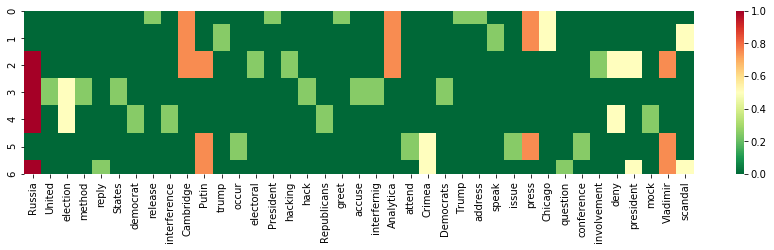

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 3))
sns.heatmap(tb / tb.max().max(), cmap="RdYlGn_r", annot=False);